In [1]:
import random, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from datetime import date, datetime, timedelta
from matplotlib.colors import ListedColormap, BoundaryNorm
sns.set_theme(style="ticks")
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'

# parameters

In [2]:
yeari, yearf = '2024', '2024'
weeki, weekf = '18', '31'

In [3]:
di = datetime.strptime(f'{yeari}-{weeki}-1', "%Y-%W-%w").date()
df = datetime.strptime(f'{yearf}-{weekf}-1', "%Y-%W-%w").date() + timedelta(6)
ds = [di+timedelta(dt) for dt in range((df-di).days+1)]
daylist = ds
print(di, 'until', df)

2024-04-29 until 2024-08-04


In [4]:
cdef = 'tl7_10m'# 'tl5_10m' 'tl6_10m' 'tl7_10m' 'tl8_10m' 'tl8_60m'
cdef_alt = '16m_10min'# tl5: 62 ... tl7: 16   tl8: 8

# load data

In [5]:
data = pd.read_csv('data/fig6/follow_didpairs.csv')
data['day'] = [d.date() for d in pd.to_datetime(data.day)]
data['stime'] = pd.to_datetime(data.stime)
dmin = data.day.min()
data['tt2'] = data.day.apply(lambda d: (d-dmin).days)*24*6 + data.stime.dt.hour*6 + (data.stime.dt.minute//10)
print(data.tt2.min(), data.tt2.max())

0 14111


In [6]:
(data.day.max()-dmin).days*24*6 + (24-1)*6 + (6-1)

14111

# analyses

In [7]:
# stability: 0 = random pair, 1 = stable pair
randstab = pd.DataFrame(data.groupby('pair').day.apply(lambda x: 0 if len(set(x))==1 else 1)).reset_index()
randstab = randstab.rename(columns={'tt':'stability','day':'stability','tt2':'stability'})
randstab

,pair,stability
0,00002996ED618C7A838A2DB70DDF751B_46A22C0ACCCB8...,0
1,00002996ED618C7A838A2DB70DDF751B_67B9CE0EE4E50...,0
2,00002996ED618C7A838A2DB70DDF751B_75320A28578ED...,0
3,00002996ED618C7A838A2DB70DDF751B_850B7F25E4122...,0
4,00006F120DEA8954E745E3D3AD098429_0189688F268EE...,0
...,...,...
2074337,FF9DE8B9584A8DDD4AA134CB4B355035_FFF130873E785...,1
2074338,FFA8BEEF4F0F178A55BCF24C50760A8F_FFD6396074342...,0
2074339,FFC988D2203B66E3A13C6C9C72B02902_FFE2BFC3655DD...,0
2074340,FFE08AD5C2843CF85D5070D2D041771B_FFF9A8C758711...,0


In [8]:
for_mat = data[['day','pair']].drop_duplicates()#.merge(randstab, on='pair', how='left')
for_mat['on'] = 1
for_mat = for_mat.set_index(['day','pair']).unstack('day').fillna(0).astype(int).sort_values(by='day', axis=1)
for_mat = for_mat['on'].reset_index().merge(randstab, on='pair').set_index('pair')
for_mat

,2024-04-29,2024-04-30,2024-05-01,2024-05-02,2024-05-03,2024-05-04,2024-05-05,2024-05-06,2024-05-07,2024-05-08,...,2024-07-27,2024-07-28,2024-07-29,2024-07-30,2024-07-31,2024-08-01,2024-08-02,2024-08-03,2024-08-04,stability
pair,,,,,,,,,,,,,,,,,,,,,
00002996ED618C7A838A2DB70DDF751B_46A22C0ACCCB8A544C54020F4D6F4EBE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00002996ED618C7A838A2DB70DDF751B_67B9CE0EE4E50D11D2194DA953C97292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
00002996ED618C7A838A2DB70DDF751B_75320A28578ED5E05EB775916FD1E659,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00002996ED618C7A838A2DB70DDF751B_850B7F25E4122323544F4EEC5EDFA3CC,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00006F120DEA8954E745E3D3AD098429_0189688F268EEAD7DF9F0C3B24096089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FF9DE8B9584A8DDD4AA134CB4B355035_FFF130873E7857AF117D899FBD62EBAD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
FFA8BEEF4F0F178A55BCF24C50760A8F_FFD6396074342E244C522EFC65989564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FFC988D2203B66E3A13C6C9C72B02902_FFE2BFC3655DD38E4F024C5B3CB8C7C1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
for_mat_0 = for_mat[for_mat.stability==0]
for_mat_1 = for_mat[for_mat.stability==1]
for_mat_1 = for_mat_1[for_mat_1.sum(axis=1) >= 30]
for_mat_1['stability'] = [10 if s==1 else 0 for s in for_mat_1.stability]
for_mat_1[for_mat_1==1] = 2
for_mat_1['stability'] = [1 if s==10 else 0 for s in for_mat_1.stability]
for_mat = pd.concat([for_mat_0, for_mat_1])
for_mat

,2024-04-29,2024-04-30,2024-05-01,2024-05-02,2024-05-03,2024-05-04,2024-05-05,2024-05-06,2024-05-07,2024-05-08,...,2024-07-27,2024-07-28,2024-07-29,2024-07-30,2024-07-31,2024-08-01,2024-08-02,2024-08-03,2024-08-04,stability
pair,,,,,,,,,,,,,,,,,,,,,
00002996ED618C7A838A2DB70DDF751B_46A22C0ACCCB8A544C54020F4D6F4EBE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00002996ED618C7A838A2DB70DDF751B_67B9CE0EE4E50D11D2194DA953C97292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
00002996ED618C7A838A2DB70DDF751B_75320A28578ED5E05EB775916FD1E659,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00002996ED618C7A838A2DB70DDF751B_850B7F25E4122323544F4EEC5EDFA3CC,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00006F120DEA8954E745E3D3AD098429_0189688F268EEAD7DF9F0C3B24096089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F9D20D1A0516397A4D42ABCB00387E16_FCF1E23311EA96806A06E4D44AF35FD2,2,2,2,0,2,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,1
FA08CE1A50607A2CE2A6077719035A1B_FBB2BE0FA2B27AD56FA882E336F8197E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,2,2,2,1
FA11B65C90CD7C4606C459FD8248DD96_FB76CC231E8B88AFD7F4C21E5C6D0D02,2,2,0,2,2,2,0,0,0,0,...,2,2,2,2,2,2,2,2,2,1


In [10]:
# subsample of pairs to be plotted
random.seed(1)
nplot = 25
pairs_toplot = for_mat.reset_index().groupby('stability').pair.apply(lambda x: random.sample(sorted(x), nplot)).explode().to_list()
# Map of values to colors
cs = sns.husl_palette(2)
value_to_color = {0: 'white', 1: cs[0], 2: cs[1]}
# Create colormap and norm
values = list(value_to_color.keys())
colors = [value_to_color[val] for val in values]
cmap = ListedColormap(colors)
norm = BoundaryNorm([v - 0.5 for v in values] + [values[-1] + 0.5], cmap.N)

In [11]:
for_heatmap = data[data.pair.isin(pairs_toplot)][['day','pair']].drop_duplicates().merge(randstab, on='pair')
for_heatmap['val'] = [2 if st==1 else 1 for st in for_heatmap.stability]
for_heatmap

,day,pair,stability,val
0,2024-05-09,03FF9B21C7BFCE9C771EF09E7CED6ACF_BD62D75D2EF14...,0,1
1,2024-05-06,89A7928B3B61709B31D6E3F3A16E8042_8F423CF9BA20A...,1,2
2,2024-05-07,89A7928B3B61709B31D6E3F3A16E8042_8F423CF9BA20A...,1,2
3,2024-05-08,89A7928B3B61709B31D6E3F3A16E8042_8F423CF9BA20A...,1,2
4,2024-05-09,89A7928B3B61709B31D6E3F3A16E8042_8F423CF9BA20A...,1,2
...,...,...,...,...
1200,2024-06-20,50DE38F87B78520BF67275EA6550834A_98A5A7E792E2B...,0,1
1201,2024-06-23,26B641620489E3814EF25922DBC5257C_6A44544611491...,0,1
1202,2024-07-29,08E5F2B90744E3371B45BF6BC5925987_29AFE9E013816...,0,1
1203,2024-06-23,0DA62333F5157162AD3D20DFB6776E4F_2BFA614A06614...,0,1


In [12]:
fullrange_rdm = pd.DataFrame([d.date() for d in pd.date_range(di, df)], columns=['day'])\
                    .merge(pd.DataFrame(pairs_toplot[:nplot], columns=['pair']), how='cross')
fullrange_rdm['stability'] = 0
fullrange_stb = pd.DataFrame([d.date() for d in pd.date_range(di, df)], columns=['day'])\
                    .merge(pd.DataFrame(pairs_toplot[nplot:], columns=['pair']), how='cross')
fullrange_stb['stability'] = 1
fullrange = pd.concat([fullrange_rdm, fullrange_stb])
for_heatmap = fullrange.merge(for_heatmap, on=['day','pair','stability'], how='left')

C:\Users\steven.schulz\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


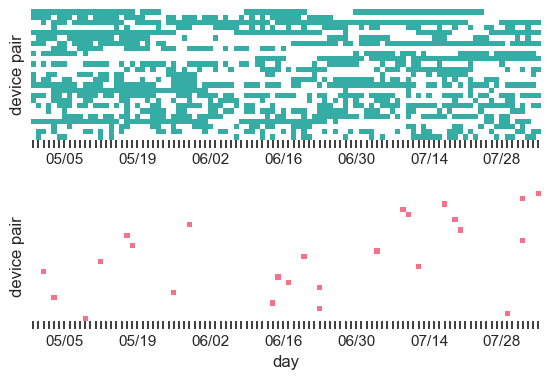

In [14]:
sns.set_theme(style="ticks")

# Function to plot a heatmap inside each facet
def heatmap_func(data, **kwargs):
    pivoted = data.pivot(index="pair", columns="day", values="val")  # Reshape
    #print(pivoted.sum(axis=1))
    sns.heatmap(pivoted.loc[::-1], cbar=False, robust=True, cmap=cmap, norm=norm, square=True, **kwargs)

# Create a FacetGrid, grouping by 'category'
g = sns.FacetGrid(for_heatmap.fillna(0), row="stability", margin_titles=False, height=2, aspect=3., row_order=[1,0])

# Map the custom heatmap function to each facet
g.map_dataframe(heatmap_func)

# Set yticks for all subplots
g.set(yticks=[], xticks=[x+.5 for x in range(len(set(data.day)))], ylabel='device pair', xlabel='day')
g.set_yticklabels([])
g.set_xticklabels([str(d.month).zfill(2)+'/'+str(d.day).zfill(2) if d.weekday()==6 and d.isocalendar().week%2==0\
                   else '' for d in sorted(set(data.day))], rotation=0)

for ax in g.axes.flat:
    #ax.set_title(ax.get_title().split('=')[1][1:])
    ax.tick_params(axis="x", labelbottom=True)

# Modify margin titles
g.set_titles(row_template='')#"{row_name}")#, col_template="{col_name}", size=14, fontweight='bold')

#g.tight_layout()
plt.savefig(f'plots/fig6/stable_random_contacts_example.jpg', bbox_inches='tight', dpi=300)
plt.savefig(f'plots/fig6/stable_random_contacts_example.pdf', bbox_inches='tight')
plt.show()

In [15]:
print([[255*n for n in c] for c in cs])

[[246.78837761945778, 112.52501282335126, 136.63163045399688], [53.664122272067374, 172.71417955164708, 164.06549979595135]]
